In [3]:
# Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [4]:
# Loading raw data
train_identity = pd.read_csv("train_identity.csv")
train_transaction = pd.read_csv("train_transaction.csv")

In [5]:
# Checking the first 5 rows to see if the data was loaded okay 
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [135]:
# Checking the first 5 rows to see if the data was loaded okay
train_transaction.head()

NameError: name 'train_transaction' is not defined

In [6]:
# merging both the datasets using 'TransactionID'
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')

In [6]:
# checking the head to make sure merging caused no problems
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [7]:
# checking the size of the dataset
train.shape

(590540, 434)

In [9]:
#Deleting transaction and identity datasets to release space
del train_transaction,train_identity

NameError: name 'train_transaction' is not defined

## Exploratory data analysis 

In [10]:
# Looking at the column names
train.columns.values

array(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain',
       'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
       'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4',
       'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14',
       'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1',
       'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29',
       'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38',
       'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47',
       'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56',
       'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65',
       'V66', 'V6

In [11]:
# Understanding variable types
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


In [12]:
print(f'There are {train.isnull().any().sum()} columns in train dataset with missing values.')

There are 414 columns in train dataset with missing values.


### Analyzing variables in batches of 20

In [13]:
print(train.iloc[:,0:20].info())
train.iloc[:,0:20].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Data columns (total 20 columns):
TransactionID     590540 non-null int64
isFraud           590540 non-null int64
TransactionDT     590540 non-null int64
TransactionAmt    590540 non-null float64
ProductCD         590540 non-null object
card1             590540 non-null int64
card2             581607 non-null float64
card3             588975 non-null float64
card4             588963 non-null object
card5             586281 non-null float64
card6             588969 non-null object
addr1             524834 non-null float64
addr2             524834 non-null float64
dist1             238269 non-null float64
dist2             37627 non-null float64
P_emaildomain     496084 non-null object
R_emaildomain     137291 non-null object
C1                590540 non-null float64
C2                590540 non-null float64
C3                590540 non-null float64
dtypes: float64(11), int64(4), object(5)
memory usage: 94.6+ MB

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0


In [14]:
#fraud percentage in the dataset
train.isFraud.mean()*100

3.4990009144173126

In [16]:
print(train.TransactionDT.unique().shape)
max(train.TransactionDT)-min(train.TransactionDT)

(573349,)


15724731

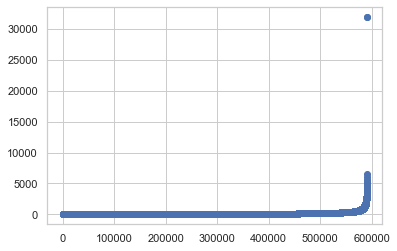

In [52]:
plt.scatter(list(range(train.shape[0])),train.sort_values('TransactionAmt').TransactionAmt)

In [53]:
train.TransactionAmt.describe()

count    590540.000000
mean        135.027176
std         239.162522
min           0.251000
25%          43.321000
50%          68.769000
75%         125.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

In [17]:
train.loc[train.TransactionAmt==31937.391,['TransactionID','isFraud','TransactionAmt','card1']]

,TransactionID,isFraud,TransactionAmt,card1
274336,3261336,0,31937.391,16075
274339,3261339,0,31937.391,16075


Text(0, 0.5, 'Transaction amount')

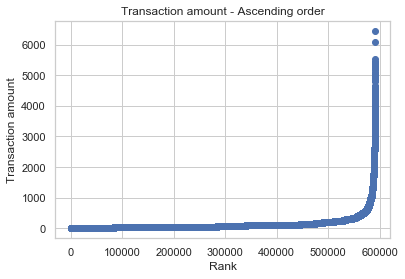

In [55]:
train=train.loc[train.TransactionAmt<31937.391,]
plt.scatter(list(range(train.shape[0])),train.sort_values('TransactionAmt').TransactionAmt)
plt.title('Transaction amount - Ascending order')
plt.xlabel('Rank')
plt.ylabel('Transaction amount')

W    439668
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64


Text(0, 0.5, 'Fraud rate')

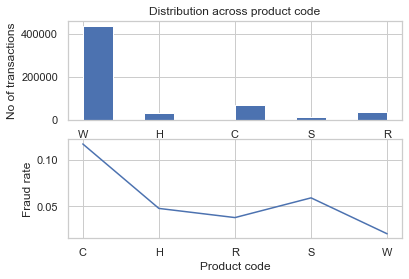

In [56]:
print(train.ProductCD.value_counts())
fig,ax=plt.subplots(2)
ax[0].hist(train.ProductCD)
ax[0].set_title('Distribution across product code')
plt.xlabel('Product code')
ax[0].set_ylabel('No of transactions')

ax[1].plot(train.groupby('ProductCD')['isFraud'].mean())
ax[1].set_ylabel('Fraud rate')

In [18]:
# Total number of cards in the dataset
train.card1.nunique()

13553

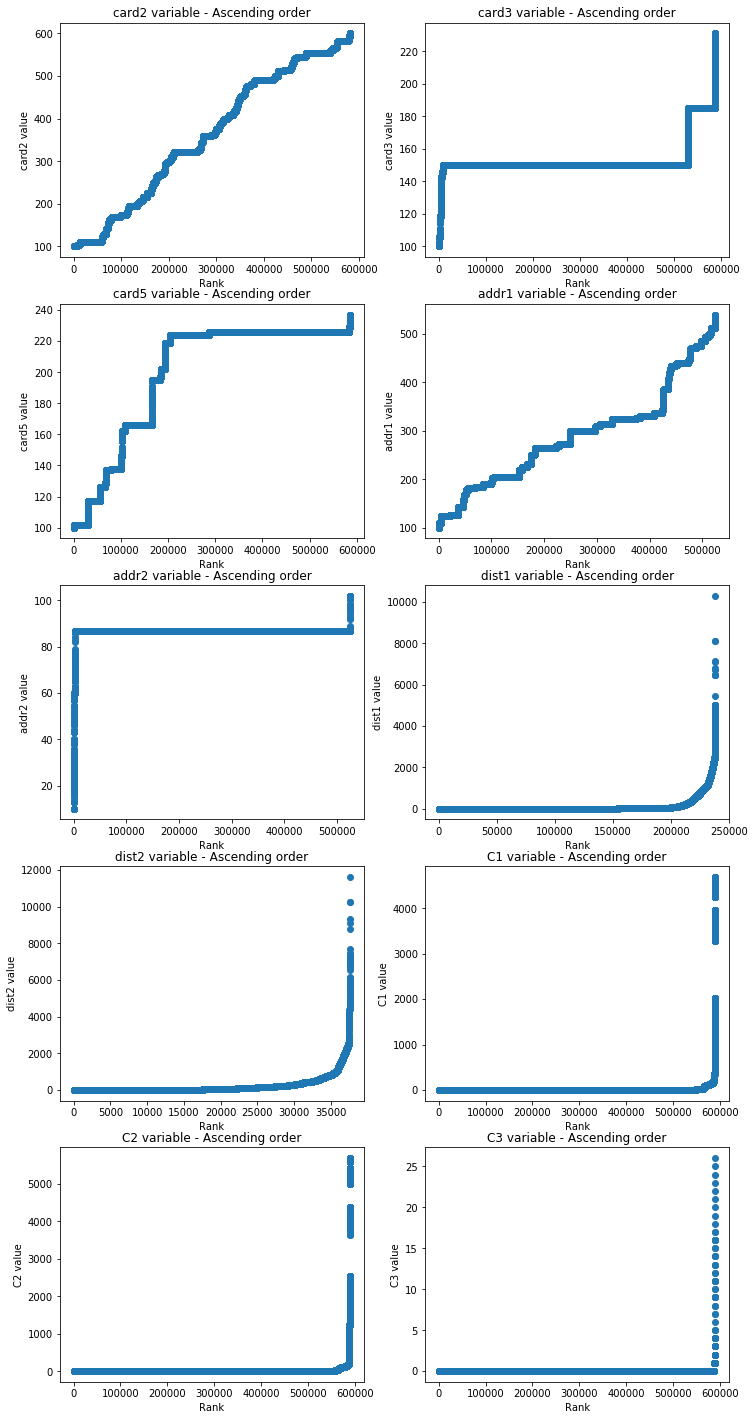

In [7]:
#card2,3,5 addr1,2, dist1,2 c1,2,3
cols=['card2','card3','card5','addr1','addr2','dist1','dist2','C1','C2','C3']
fig,ax=plt.subplots(5,2, figsize=(12,25))
#ax[0,0].plot(list(range(train.shape[0])),train.sort_values(cols[0]).loc[:,cols[0]])
cnt=0
for i in range(5):
    for j in range(2):
        ax[i,j].scatter(list(range(train.shape[0])),train.sort_values(cols[cnt]).loc[:,cols[cnt]])
        ax[i,j].set_title(f'{cols[cnt]} variable - Ascending order')
        ax[i,j].set_xlabel('Rank')
        ax[i,j].set_ylabel(f'{cols[cnt]} value')
        cnt+=1

In [ ]:
train.loc[:,cols].describe()
# card2 variable distribution
#print(train.card2.describe())
#plt.scatter(list(range(train.shape[0])),train.sort_values('card2').card2)
#plt.title('card2 variable - Ascending order')
#plt.xlabel('Rank')
#plt.ylabel('card2 value')

In [ ]:
print('C1 - ',np.quantile(train.C1,[0.8,0.95,0.99,0.999]))
print('C2 - ',np.quantile(train.C2,[0.8,0.95,0.99,0.999]))
print('C3 - ',np.quantile(train.C3,[0.8,0.95,0.99,0.999]))

##### Looking at the distributions, we understand that applying logarithm on dist1 & dist2 variables would make them more linear and sclae down the extreme values - all the values less than 1 will be flagged as 0

##### Variables C1 & C2 will be capped at 99th percentile value as the median and means have significant differences caused by a few extreme values

##### All values greater than zero are marked 1 in variable C3 as more than 99 percent of the values are zero

In [8]:
# Modifying dist1
train.loc[train.dist1<1,'dist1']=1
train.dist1=np.log(train.dist1)

#dist2
train.loc[train.dist2<1,'dist2']=1
train.dist2=np.log(train.dist2)

#C1 & C2
train.loc[train.C1>np.quantile(train.C1,0.99),'C1']=np.quantile(train.C1,0.99)
train.loc[train.C2>np.quantile(train.C2,0.99),'C2']=np.quantile(train.C2,0.99)

#C3
train.loc[train.C3>0,'C3']=1

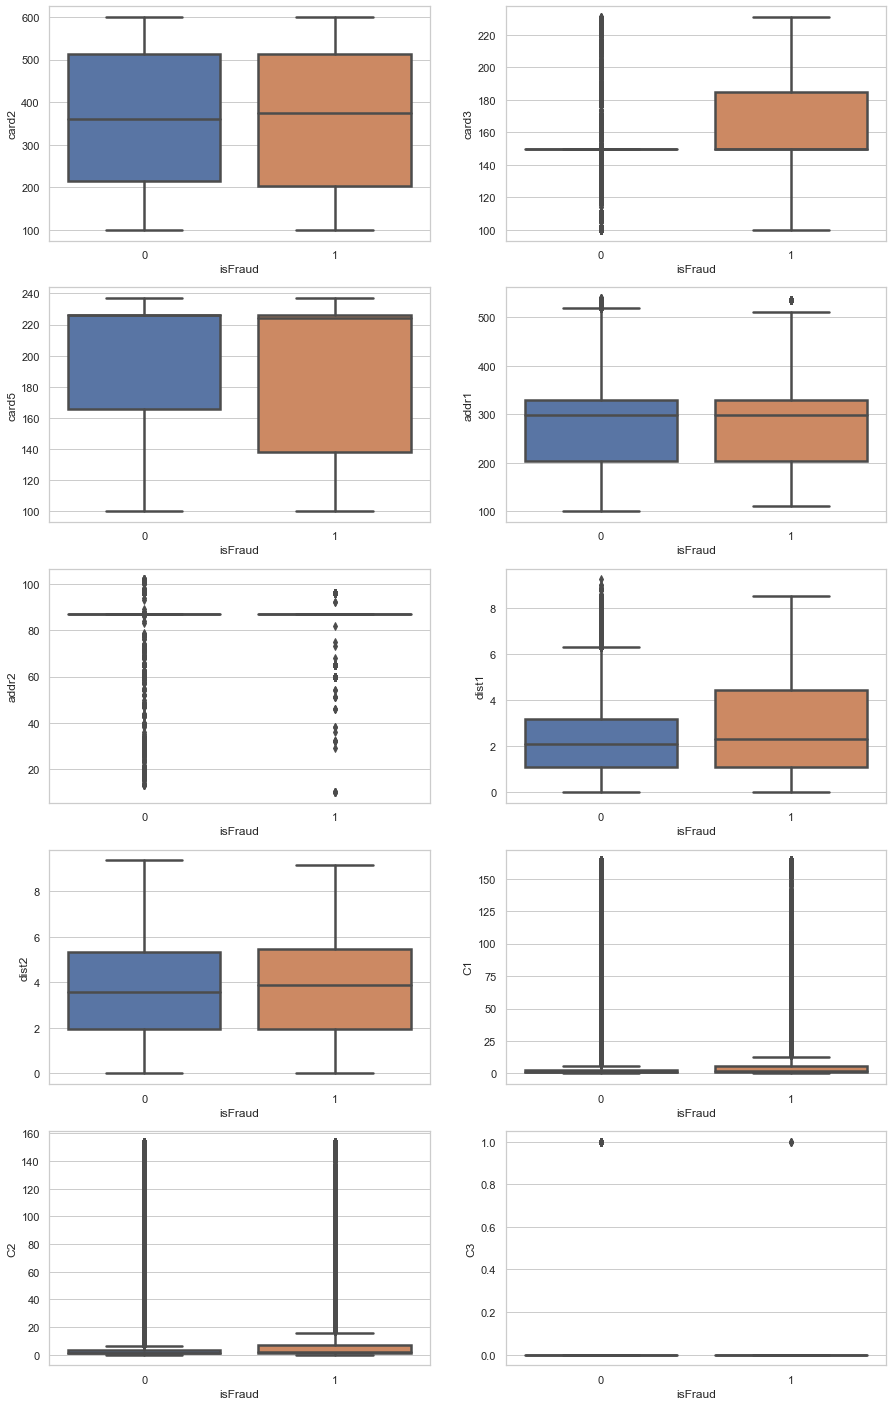

In [21]:
sns.set(style="whitegrid")
fig,ax=plt.subplots(5,2, figsize=(15,25))
for i,t in enumerate(cols):
    sns.boxplot(x="isFraud", y=train.loc[:,t], data=train, linewidth=2.5,ax=ax[i//2,i%2])

In [22]:
#train.boxplot(by='isFraud',column=['card2','card3'],layout=(2,1))
#train.boxplot(by='isFraud',column=['card2','card3'],grid=False)
train.iloc[:,0:20].fillna(train.iloc[:,0:20].median(),inplace=True)

1) TransactionID, isFraud, TransactionDT, TransactionAmt, ProductCD, card1, c1,c2,c3 variables have no missing values.

2) We observe that the fraud rate in this dataset is 3.5%.

3) Transaction date has 573,349 unique values for 590,540 transactions. This shows that the transaction date is a timestamp

4) We observe that there is an outlier in TransactionAmt column. Also, the transactions with extremely high value are flagged as non-fraud. This could be a data error. Having such high values would cause problems while building models. Hence, removed these row

In [15]:
cat_vars=['card4','card6','ProductCD','P_emaildomain','R_emaildomain']
for i in range(len(cat_vars)):
    print(train.loc[:,cat_vars[i]].value_counts())
    print('\n')

visa                384767
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64


debit              439938
credit             148986
debit or credit        30
charge card            15
Name: card6, dtype: int64


W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64


gmail.com           228355
yahoo.com           100934
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net      

In [16]:
train.loc[~train.card6.isin(['debit','credit']),'card6'] = np.nan
train[['P_emaildomain']]=train.P_emaildomain.str.split('.',expand=True)[0]
train[['R_emaildomain']]=train.R_emaildomain.str.split('.',expand=True)[0]
train.loc[~train.P_emaildomain.isin(['gmail','yahoo','hotmail','anonymous','aol','comcast','icloud','outlook','msn','att']),'P_emaildomain'] = np.nan
train.loc[~train.R_emaildomain.isin(['gmail','yahoo','hotmail','anonymous','aol','comcast','icloud','outlook','msn','att']),'R_emaildomain'] = np.nan

In [17]:
cat_cols = ['card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'ProductCD']
for col in cat_cols:
    le = LabelEncoder()
    le.fit(list(train[col].astype(str).values))
    train[col] = le.transform(list(train[col].astype(str).values))

In [18]:
print(train.iloc[:,394:].info())
train.iloc[:,394:].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Data columns (total 37 columns):
id_01         144233 non-null float64
id_02         140872 non-null float64
id_03         66324 non-null float64
id_04         66324 non-null float64
id_05         136865 non-null float64
id_06         136865 non-null float64
id_07         5155 non-null float64
id_08         5155 non-null float64
id_09         74926 non-null float64
id_10         74926 non-null float64
id_11         140978 non-null float64
id_12         144233 non-null object
id_13         127320 non-null float64
id_14         80044 non-null float64
id_15         140985 non-null object
id_16         129340 non-null object
id_17         139369 non-null float64
id_18         45113 non-null float64
id_19         139318 non-null float64
id_20         139261 non-null float64
id_21         5159 non-null float64
id_22         5169 non-null float64
id_23         5169 non-null object
id_24         4747 non-null float64

,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,...,id_28,id_29,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,New,NotFound,32.0,2397600.0,match_status:2,T,F,T,T,mobile


In [19]:
#Separating continuous and categorical variables
cat_vars = ['id_12','id_15','id_16','id_23','id_27','id_28','id_29','id_30','id_31','id_33','id_34','id_35','id_36','id_37','id_38','DeviceType','DeviceInfo']
cont_vars = [item for item in train.iloc[:,394:].columns if item not in cat_vars]

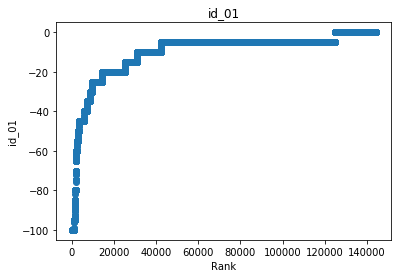

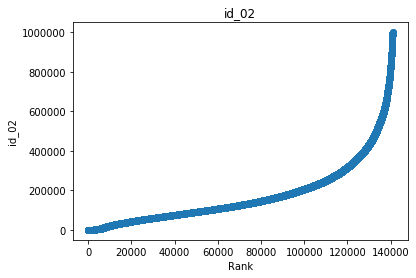

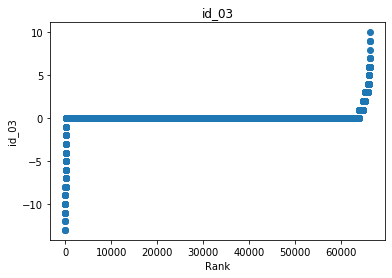

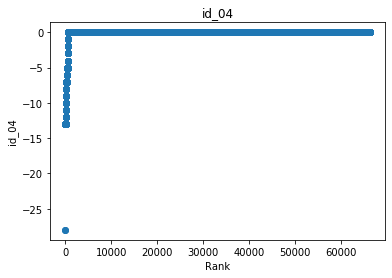

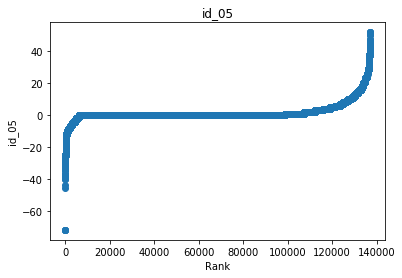

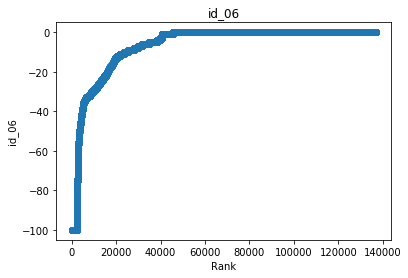

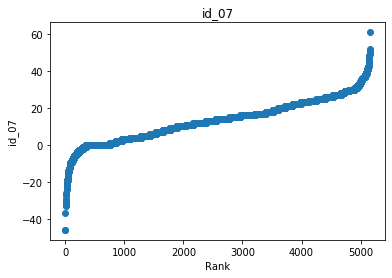

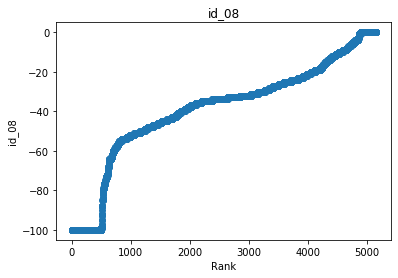

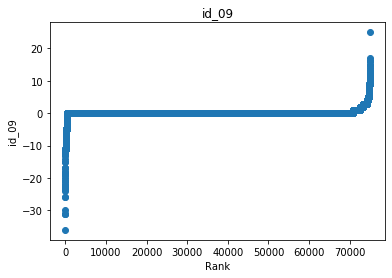

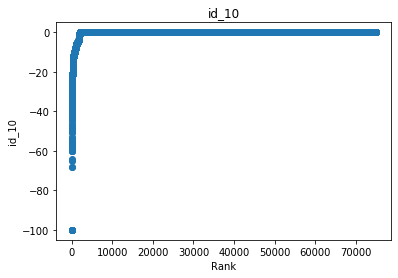

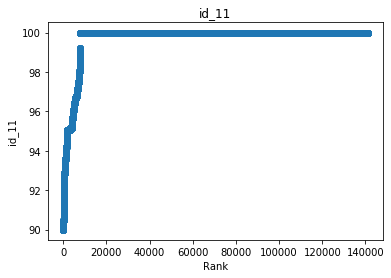

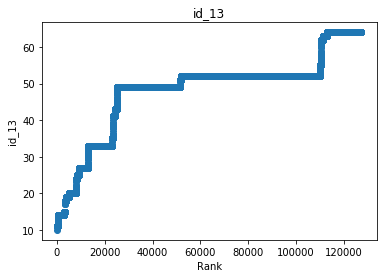

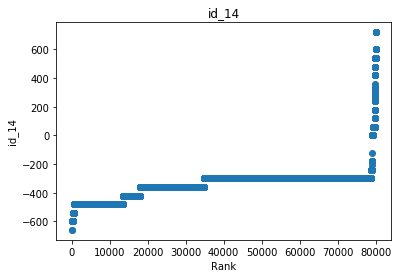

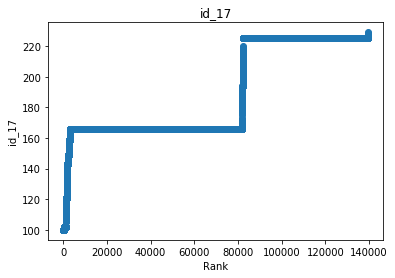

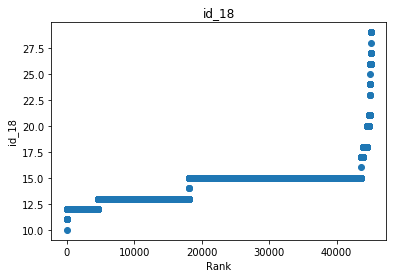

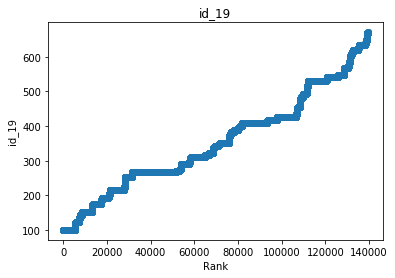

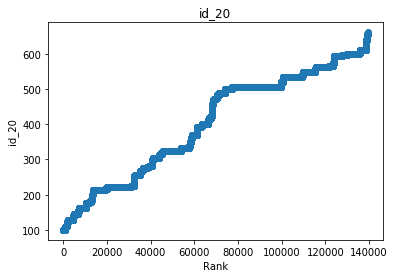

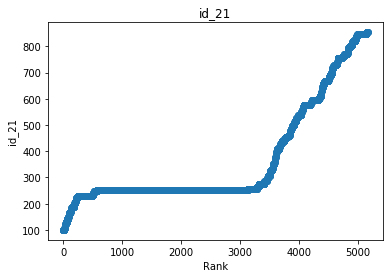

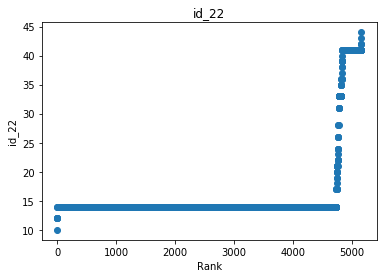

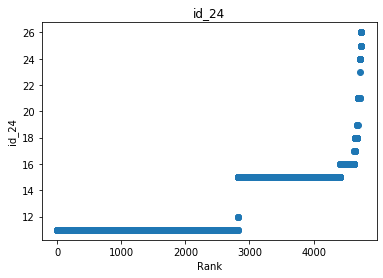

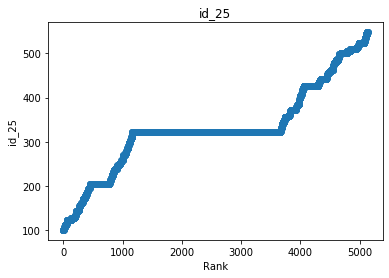

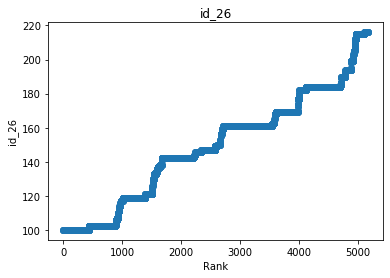

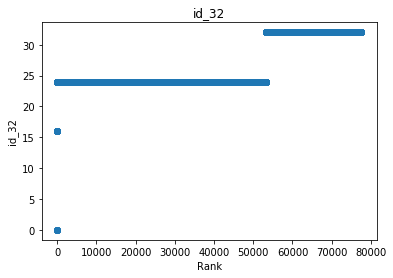

In [20]:
for i in range(len(cont_vars)):
    plt.scatter(list(range(train.shape[0])), train.sort_values(cont_vars[i]).loc[:,cont_vars[i]])
    plt.title(cont_vars[i])
    plt.xlabel('Rank')
    plt.ylabel(cont_vars[i])
    plt.show()

In [21]:
# All distibutions look good except for id_02 which has very high values and hence applying logarithmic transformation on it
# Modifying id_02
#train.loc[train.id_02<1,'id_02']=1
#train.id_02=np.log(train.id_02)

In [22]:
for i in range(len(cat_vars)):
    print(train.loc[:,cat_vars[i]].value_counts())
    print('\n')

NotFound    123025
Found        21208
Name: id_12, dtype: int64


Found      67728
New        61612
Unknown    11645
Name: id_15, dtype: int64


Found       66324
NotFound    63016
Name: id_16, dtype: int64


IP_PROXY:TRANSPARENT    3489
IP_PROXY:ANONYMOUS      1071
IP_PROXY:HIDDEN          609
Name: id_23, dtype: int64


Found       5155
NotFound      14
Name: id_27, dtype: int64


Found    76232
New      64746
Name: id_28, dtype: int64


Found       74926
NotFound    66052
Name: id_29, dtype: int64




KeyError: 'id_30'

In [ ]:
type(train.id_33[101])
train.id_33[101]

In [ ]:
# Removing DeviceInfo variable as there are too many categories and we have a variable to capture mobile/desktop info
# similarly id_30 & id_31 are also deleted as they have too many categories
# converting id_33 into single number by multiplying length & breadth
#np.prod(list(map(int, '1920x1080'.split('x'))))

train.drop(['id_30','id_31','DeviceInfo'],axis=1,inplace=True)
train[['id_33_a','id_33_b']]=train.id_33.str.split('x',expand=True)
train['id_33_a']=pd.to_numeric(train['id_33_a'])
train['id_33_b']=pd.to_numeric(train['id_33_b'])
train['id_33']=train['id_33_a']*train['id_33_b']
train.id_33.fillna(0,inplace=True)
train.drop(['id_33_a','id_33_b'],axis=1,inplace=True)

In [ ]:
#Converting categorical columns to numerical

cat_vars = ['id_12','id_15','id_16','id_23','id_27','id_28','id_29','id_34','id_35','id_36','id_37','id_38','DeviceType']
for col in cat_vars:
    le = LabelEncoder()
    le.fit(list(train[col].astype(str).values))
    train[col] = le.transform(list(train[col].astype(str).values))

In [ ]:
#Columns C4-C14
columns1 = ['C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14']
train[columns1].describe()

In [ ]:
#C4-C14
cols1=['C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14','C14']
fig,ax=plt.subplots(6,2, figsize=(10,25))
#ax[0,0].plot(list(range(train.shape[0])),train.sort_values(cols[0]).loc[:,cols[0]])
cnt=0
for i in range(6):
    for j in range(2):
        ax[i,j].scatter(list(range(train.shape[0])),train.sort_values(cols1[cnt]).loc[:,cols1[cnt]])
        ax[i,j].set_title(f'{cols1[cnt]} variable - Ascending order')
        ax[i,j].set_xlabel('Rank')
        ax[i,j].set_ylabel(f'{cols1[cnt]} value')
        cnt+=1

In [ ]:
columns1 = ['C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14']

for i in range(len(columns1)):
    plt.scatter(train['TransactionDT'], train[columns1[i]])

In [ ]:
columns1 = ['C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14']

for i in range(len(columns1)):
    plt.scatter(train['TransactionDT'], train[columns1[i]])
    plt.title(columns1[i])
    plt.xlabel('TransactionDT')
    plt.ylabel(columns1[i])
    plt.show()

In [ ]:
#C4-C14 Capping at 99th percentile
train.loc[train.C4>np.quantile(train.C4,0.99),'C4']=np.quantile(train.C4,0.99)
train.loc[train.C5>np.quantile(train.C5,0.99),'C5']=np.quantile(train.C5,0.99)
train.loc[train.C6>np.quantile(train.C6,0.99),'C6']=np.quantile(train.C6,0.99)
train.loc[train.C7>np.quantile(train.C7,0.99),'C7']=np.quantile(train.C7,0.99)
train.loc[train.C8>np.quantile(train.C8,0.99),'C8']=np.quantile(train.C8,0.99)
train.loc[train.C9>np.quantile(train.C9,0.99),'C9']=np.quantile(train.C9,0.99)
train.loc[train.C10>np.quantile(train.C10,0.99),'C10']=np.quantile(train.C10,0.99)
train.loc[train.C11>np.quantile(train.C11,0.99),'C11']=np.quantile(train.C11,0.99)
train.loc[train.C12>np.quantile(train.C12,0.99),'C12']=np.quantile(train.C12,0.99)
train.loc[train.C13>np.quantile(train.C13,0.99),'C13']=np.quantile(train.C13,0.99)
train.loc[train.C14>np.quantile(train.C14,0.99),'C14']=np.quantile(train.C14,0.99)

In [ ]:
#Cleaned C Values
columns1 = ['C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14']

for i in range(len(columns1)):
    plt.scatter(list(range(train.shape[0])), train.sort_values(columns1[i]).loc[:,columns1[i]])
    plt.title(columns1[i])
    plt.xlabel('Rank')
    plt.ylabel(columns1[i])
    plt.show()

In [ ]:
# M-Columns (M1-M9)
columns = ['M1','M2','M3','M4','M5','M6','M7','M8','M9']
train[columns].describe()

In [ ]:
train[columns].isnull().sum()

In [ ]:
#Checking the values of M4, as it is different from others

train.groupby('M4').count()

In [ ]:
#Columns before transformation
cat_cols = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']

train[cat_cols].head()

In [ ]:
#Converting categorical columns to numerical columns

from sklearn.preprocessing import LabelEncoder

cat_cols = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']
for col in cat_cols:
    le = LabelEncoder()
    le.fit(list(train[col].astype(str).values))
    train[col] = le.transform(list(train[col].astype(str).values))

In [ ]:
#Columns after transformation
cat_cols = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']

train[cat_cols].head()

In [ ]:
'''
#Converting transactionDT to days

train['days'] = (train['TransactionDT']/86400)
train.drop(['days'], axis=1, inplace=True)
train.head()
'''
#sns.boxplot(x=train['isFraud'], y=train['days'])
sns.boxplot(x=train['isFraud'], y=train['TransactionDT'])

In [ ]:
# D-Columns (D1-D15)
columns2 = ['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D12','D13','D14','D15']
train[columns2].describe()

In [ ]:
train[columns2].head()

In [ ]:
#No. of null values in D columns
train[columns2].isnull().sum()

In [ ]:
#Plotting D values
for i in range(len(columns2)):
    train.set_index('TransactionDT')[columns2[i]].plot(style='.')
    plt.show()

In [ ]:
# DeviceType
ax = sns.countplot(x="DeviceType", data=train)
ax.set_title('DeviceType')
plt.show()

In [ ]:
#Listing columns with null values
train.columns[train.isna().any()].tolist()

In [ ]:
i = 0
d_val = ['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D12','D13','D14','D15']
for i in range(len(d_val)):
    train[d_val[i]].fillna(train[d_val[i]].median(),inplace=True)

In [ ]:
i = 0

v_val = ['V1',
       'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29',
       'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38',
       'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47',
       'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56',
       'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65',
       'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74',
       'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83',
       'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92',
       'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101',
       'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109',
       'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117',
       'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125',
       'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133',
       'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141',
       'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149',
       'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157',
       'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165',
       'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173',
       'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181',
       'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189',
       'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197',
       'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205',
       'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213',
       'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221',
       'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229',
       'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237',
       'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245',
       'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253',
       'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V260', 'V261',
       'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269',
       'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277',
       'V278', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285',
       'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293',
       'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301',
       'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309',
       'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317',
       'V318', 'V319', 'V320', 'V321', 'V322', 'V323', 'V324', 'V325',
       'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333',
       'V334', 'V335', 'V336', 'V337', 'V338', 'V339']

for i in range(len(v_val)):
    train[v_val[i]].fillna(train[v_val[i]].median(),inplace=True)

In [ ]:
first_cols_cont = ['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3']

for i in range(len(first_cols_cont)):
    train[first_cols_cont[i]].fillna(train[first_cols_cont[i]].median(),inplace=True)

In [ ]:
train.iloc[:,0:20]


In [ ]:
cat_vars = ['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain','id_12','id_15','id_16','id_23','id_27','id_28','id_29','id_30','id_31','id_33','id_34','id_35','id_36','id_37','id_38','DeviceType','DeviceInfo']
cont_vars = [item for item in train.iloc[:,394:].columns if item not in cat_vars]

In [ ]:
for i in range(len(cont_vars)):
    train[cont_vars[i]].fillna(train[cont_vars[i]].median(),inplace=True)

In [ ]:
#Listing columns with null values
train.columns[train.isna().any()].tolist()

In [ ]:
train.card4.isnull().sum()

In [ ]:
train.head()

In [ ]:
train.describe

In [ ]:
train.isnull

In [26]:
train.columns
# Seperate data into training and test datasets
from sklearn.model_selection import train_test_split
y=train['isFraud']
X = train.iloc[:,2:431]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)


0    398836
1     14542
Name: isFraud, dtype: int64


Text(0.5, 1.0, 'Class Counts (Checking for Imbalance)')

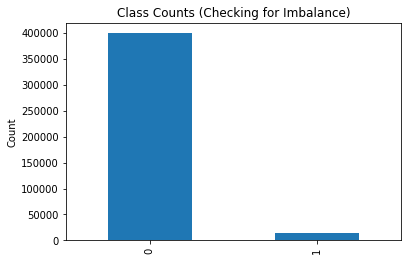

In [27]:
# Looking at the proportions of customers exited and retained in the training sample
print(y_train.value_counts())
y_train.value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.title('Class Counts (Checking for Imbalance)')

In [28]:
y_train

464452    0
36372     0
572387    0
497276    0
97470     0
         ..
359783    0
152315    0
117952    0
435829    0
305711    0
Name: isFraud, Length: 413378, dtype: int64

In [ ]:
training=pd.concat([X_train,y_train],axis=1)
del training
#differentiating fraud and non-fraud transactions
#not_fraud=training[training.isFraud==0]
#fraud=training[training.isFraud==1]
#not_fraud.shape

1    14542
0    14542
Name: isFraud, dtype: int64


Text(0.5, 1.0, 'Class Counts (Checking for Imbalance)')

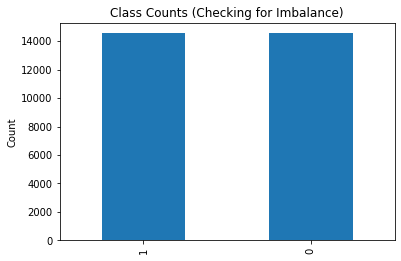

In [29]:
# Random undersampling to rectify the target class imbalance problem

from imblearn import under_sampling
from imblearn.under_sampling import RandomUnderSampler

sampler = RandomUnderSampler()
X_train_sampled, y_train_sampled = sampler.fit_sample(X_train, y_train)
y_train_sampled = pd.Series(y_train_sampled)
print(y_train_sampled.value_counts())

y_train_sampled.value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.title('Class Counts (Checking for Imbalance)')

In [30]:
print(X_train_sampled.shape)
print(y_train_sampled.shape)

(29084, 429)
(29084,)


In [31]:
# Building a Random Forest Prediction model for binary classfication on Test data 
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=1000)

clf.fit(X_train_sampled,y_train_sampled)
y_pred=clf.predict(X_test)
print(y_pred)


ValueError: could not convert string to float: 'T'

In [ ]:
# evaluation
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
print(classification_report(y_test, y_pred))


In [ ]:
print(confusion_matrix(y_test,y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


labels = [0, 1]
cm = confusion_matrix(y_test, y_pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#Accuracy
print("Accuracy of random forest" ,round(clf.score(X_test, y_test)*100,2),'%')

In [ ]:
# ROC-AUC Curve for random forest Model
fpr, tpr, thresholds_RF = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic of random forest')
plt.plot(fpr, tpr, 'b',label='AUC curve (area = %0.2f)'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#weighted cost
from sklearn.metrics import confusion_matrix
def custom_cost(y_true, y_pred, fn_cost=1, fp_cost=1):
        cm=confusion_matrix(y_true,y_pred)
        loss = (cm[1,0]*fn_value + cm[0,1]*fp_value)/cm.sum()
        return loss

In [24]:
#Decision Tress
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(random_state = 2)
clf1.fit(X_train,y_train)
# y_pred = clf.predict(X_test)  # default threshold is 0.5
y_pred1 = (clf1.predict_proba(X_test)[:,1] >= 0.2).astype(bool) # set threshold as 0.3
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test,y_pred1))


NameError: name 'X_train' is not defined

In [ ]:
#Accuracy
print("Accuracy of decision tree" ,round(clf.score(X_test, y_test)*100,2),'%')

In [ ]:
# ROC-AUC Curve for random forest Model
fpr, tpr, thresholds_RF = metrics.roc_curve(y_test, y_pred1)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic of random forest')
plt.plot(fpr, tpr, 'b',label='AUC curve (area = %0.2f)'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:

y_dstrain=downsampled['isFraud']
X_dstrain = downsampled.iloc[:,2:431]
X_dstrain
type(y_dstrain)


In [ ]:
#X_dstrain = np.array(X_dstrain)
#X_dstrain.reset_index().values.ravel().view(dtype=[('index', int)])
#type(X_dstrain)

In [ ]:
#test[['card4','card6','P_emaildomain','R_emaildomain','ProductCD']]
test['isFraud']

In [ ]:

cat_cols = ['card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'ProductCD']
for col in cat_cols:
    le = LabelEncoder()
    le.fit(list(test[col].astype(str).values))
    test[col] = le.transform(list(train[col].astype(str).values))

In [ ]:
#Converting categorical columns to numerical columns

from sklearn.preprocessing import LabelEncoder

cat_cols = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']
for col in cat_cols:
    le = LabelEncoder()
    le.fit(list(test[col].astype(str).values))
    test[col] = le.transform(list(test[col].astype(str).values))